In [ ]:
#Rice InceptionV3 Rice Leaf Disease

In [ ]:
#https://www.kaggle.com/code/isaacritharson/inceptionv3-rice-leaf-disease/notebook

In [19]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\vinod\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1770: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [20]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [21]:
IMAGE_SIZE = [224, 224]
train_path = 'train'
valid_path = 'validation'

In [22]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [23]:
for layer in inception.layers:
    layer.trainable = False

In [24]:
folders = glob('train/*')

In [25]:
folders

['train\\Bacterial blight',
 'train\\Blast',
 'train\\Brownspot',
 'train\\Healthy',
 'train\\Tungro']

In [26]:
x = Flatten()(inception.output)

In [27]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [28]:
prediction

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_1')>

In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

                                                                                                  
 conv2d_105 (Conv2D)         (None, 25, 25, 32)           6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_normalization_99 (Ba  (None, 25, 25, 64)           192       ['conv2d_99[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_101 (B  (None, 25, 25, 64)           192       ['conv2d_101[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_104 (B  (None, 25, 25, 96)           288       ['conv2d_104[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_111[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_112 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_112[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_106[0][0]',      
                                                                     'activation_108[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_122 (Conv2D)         (None, 25, 25, 96)           55296     ['activation_121[0][0]']      
                                                                                                  
 batch_normalization_122 (B  (None, 25, 25, 96)           288       ['conv2d_122[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_122 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_122[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_12

                                                                                                  
 conv2d_124 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_127 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_126[0][0]']      
                                                                                                  
 conv2d_132 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_131[0][0]']      
                                                                                                  
 conv2d_133 (Conv2D)         (None, 12, 12, 192)          147456    ['average_pooling2d_12[0][0]']
                                                                                                  
 batch_normalization_124 (B  (None, 12, 12, 192)          576       ['conv2d_124[0][0]']          
 atchNorma

 activation_141 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_141[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_13 (Aver  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_134 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_137 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_136[0][0]']      
                                                                                                  
 conv2d_14

 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_146[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_151 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_151[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_14 (Aver  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_156 (B  (None, 12, 12, 192)          576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 12, 12, 192)          576       ['conv2d_161[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, 5, 5, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, 5, 5, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, 5, 5, 320)            960       ['conv2d_165[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, 5, 5, 192)            576       ['conv2d_169[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_177[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_178 (B  (None, 5, 5, 192)            576       ['conv2d_178[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_185[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
          

In [30]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2846 images belonging to 5 classes.


In [33]:
test_set = test_datagen.flow_from_directory('validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 180 images belonging to 5 classes.


In [34]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\vinod\AppData\Local\Temp/ipykernel_15452/1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
89/89 [==============================] - 242s 3s/step - loss: 2.1750 - accuracy: 0.8011 - val_loss: 0.4573 - val_accuracy: 0.8889
Epoch 2/50
89/89 [==============================] - 179s 2s/step - loss: 0.2426 - accuracy: 0.9434 - val_loss: 0.0542 - val_accuracy: 0.9778
Epoch 3/50
89/89 [==============================] - 175s 2s/step - loss: 0.2772 - accuracy: 0.9441 - val_loss: 0.0947 - val_accuracy: 0.9611
Epoch 4/50
89/89 [==============================] - 176s 2s/step - loss: 0.2058 - accuracy: 0.9628 - val_loss: 0.1686 - val_accuracy: 0.9556
Epoch 5/50
89/89 [==============================] - 174s 2s/step - loss: 0.1516 - accuracy: 0.9722 - val_loss: 0.0335 - val_accuracy: 0.9833
Epoch 6/50
89/89 [==============================] - 292s 3s/step - loss: 0.1028 - accuracy: 0.9761 - val_loss: 0.1110 - val_accuracy: 0.9778
Epoch 7/50
89/89 [==============================] - 351s 4s/step - loss: 0.2529 - accuracy: 0.9592 - val_loss: 0.0444 - val_accuracy: 0.9833
Epoch 8/50
89

In [35]:
import matplotlib.pyplot as plt

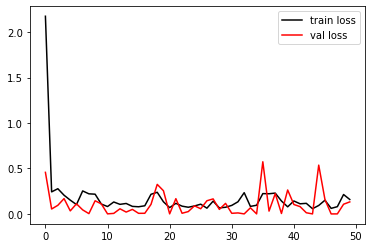

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="red")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

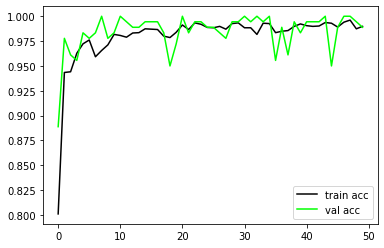

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="lime")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

C:\Users\vinod\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
model=load_model('model_inception.h5')

In [40]:
y_pred = model.predict(test_set)
y_pred

6/6 [==============================] - 8s 1s/step


array([[0.00000000e+00, 1.00000000e+00, 1.62250401e-30, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 3.64016231e-34, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.15494963e-18, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.1494

In [41]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 3, 4, 1, 1, 3, 1, 0, 4, 1, 0, 1, 0, 3, 4, 4, 1, 2, 0, 1, 3, 0,
       1, 1, 4, 0, 3, 0, 2, 1, 0, 2, 2, 1, 2, 0, 4, 3, 2, 4, 4, 1, 2, 4,
       3, 3, 3, 2, 0, 4, 3, 2, 4, 3, 0, 4, 2, 0, 0, 4, 4, 2, 2, 1, 3, 4,
       4, 2, 4, 2, 1, 1, 0, 1, 4, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2,
       4, 3, 1, 2, 4, 0, 4, 4, 4, 3, 1, 4, 1, 2, 2, 2, 0, 4, 4, 2, 2, 4,
       0, 1, 0, 0, 1, 1, 0, 3, 0, 4, 2, 0, 0, 3, 1, 3, 2, 4, 2, 2, 2, 4,
       2, 2, 1, 1, 4, 1, 0, 0, 2, 2, 1, 4, 4, 2, 1, 3, 1, 1, 0, 4, 0, 4,
       1, 2, 0, 4, 2, 0, 0, 1, 0, 1, 4, 4, 4, 0, 3, 4, 2, 2, 0, 0, 0, 2,
       2, 2, 1, 1], dtype=int64)

In [42]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [43]:
img_data

NameError: name 'img_data' is not defined

In [44]:
img=image.load_img('test_img.jpg',target_size=(224,224))

In [45]:
x=image.img_to_array(img)
x

array([[[194., 189., 193.],
        [186., 184., 187.],
        [183., 181., 182.],
        ...,
        [165., 196., 165.],
        [166., 197., 165.],
        [168., 199., 167.]],

       [[202., 197., 201.],
        [192., 190., 193.],
        [187., 185., 186.],
        ...,
        [165., 196., 165.],
        [165., 196., 164.],
        [167., 198., 166.]],

       [[201., 199., 202.],
        [197., 195., 198.],
        [194., 194., 194.],
        ...,
        [164., 195., 164.],
        [165., 196., 164.],
        [167., 198., 166.]],

       ...,

       [[158., 161., 154.],
        [154., 157., 150.],
        [150., 155., 148.],
        ...,
        [113., 157.,  96.],
        [113., 157.,  96.],
        [113., 157.,  96.]],

       [[157., 160., 153.],
        [151., 156., 149.],
        [150., 156., 146.],
        ...,
        [112., 156.,  95.],
        [112., 156.,  95.],
        [112., 156.,  95.]],

       [[157., 160., 151.],
        [151., 157., 147.],
        [148., 1

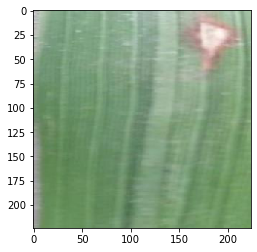

In [46]:
from matplotlib.pyplot import imshow
imshow(img)

In [47]:
x=x/255

In [48]:
x

array([[[0.7607843 , 0.7411765 , 0.75686276],
        [0.7294118 , 0.72156864, 0.73333335],
        [0.7176471 , 0.70980394, 0.7137255 ],
        ...,
        [0.64705884, 0.76862746, 0.64705884],
        [0.6509804 , 0.77254903, 0.64705884],
        [0.65882355, 0.78039217, 0.654902  ]],

       [[0.7921569 , 0.77254903, 0.7882353 ],
        [0.7529412 , 0.74509805, 0.75686276],
        [0.73333335, 0.7254902 , 0.7294118 ],
        ...,
        [0.64705884, 0.76862746, 0.64705884],
        [0.64705884, 0.76862746, 0.6431373 ],
        [0.654902  , 0.7764706 , 0.6509804 ]],

       [[0.7882353 , 0.78039217, 0.7921569 ],
        [0.77254903, 0.7647059 , 0.7764706 ],
        [0.7607843 , 0.7607843 , 0.7607843 ],
        ...,
        [0.6431373 , 0.7647059 , 0.6431373 ],
        [0.64705884, 0.76862746, 0.6431373 ],
        [0.654902  , 0.7764706 , 0.6509804 ]],

       ...,

       [[0.61960787, 0.6313726 , 0.6039216 ],
        [0.6039216 , 0.6156863 , 0.5882353 ],
        [0.5882353 , 0

In [49]:
import cv2
x = cv2.resize(x,(224,224)) 
x = x.reshape(1,224,224,3) 

In [50]:
x.shape

(1, 224, 224, 3)

In [51]:
model.predict(x)

1/1 [==============================] - 1s 1s/step


array([[0.000000e+00, 1.000000e+00, 4.153552e-18, 0.000000e+00,
        0.000000e+00]], dtype=float32)

In [52]:
a=model.predict(x)

1/1 [==============================] - 0s 78ms/step


In [53]:
a.argmax()

1

In [54]:
folders

['train\\Bacterial blight',
 'train\\Blast',
 'train\\Brownspot',
 'train\\Healthy',
 'train\\Tungro']